#### Code for the Decision Tree Model 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

#### Importing Data 

In [2]:
validation_data = pd.read_csv("Test_Zero _Var.csv")
train_data = pd.read_csv("Train_Zero _Var.csv")

In [3]:
train_data.groupby('labels').size()

labels
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

#### Data samples creation

In [5]:
response_data = train_data['labels']
predictor_data = train_data.drop(['labels'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split  # Random sampling with seed(randomstate)
r_predictor_train, r_predictor_test, r_response_train, r_response_test = train_test_split(predictor_data, response_data, random_state=1084203)

In [7]:
sample_sets = {'train_predictor':r_predictor_train, 'train_response':r_response_train, 'test_predictor':r_predictor_test, 'test_response':r_response_test}

#### Model Creation  And Prediction for Decision Tree

In [8]:
from sklearn import tree

In [9]:
clf = tree.DecisionTreeClassifier()

In [10]:
clf = clf.fit(r_predictor_train, r_response_train)

In [11]:
predicted_tree= clf.predict(r_predictor_test)

#### Evaluation of the model 

In [12]:
from sklearn import metrics

In [13]:
print("Confusion Matrix \n",metrics.confusion_matrix(r_response_test, predicted_tree))

Confusion Matrix 
 [[ 922    2   15    7    3   20   21    9   12   14]
 [   4 1094   22   10    4    6    8    7    8    7]
 [  19   22  829   32   17   18   18   46   29   15]
 [   6   12   37  876    6   53    9   19   39   34]
 [   3   10   13   12  916    9   14   14   29   57]
 [   8   10   14   65   12  766   20    9   30   23]
 [  16    4   18   10    7   43  931    4   18    6]
 [   2    4   22   18   11    9    2  963    9   24]
 [  15   20   36   46   22   51   17   11  746   33]
 [   5    8   12   16   66   22    7   40   24  817]]


In [14]:
print(metrics.classification_report(r_response_test, predicted_tree))

             precision    recall  f1-score   support

          0       0.92      0.90      0.91      1025
          1       0.92      0.94      0.93      1170
          2       0.81      0.79      0.80      1045
          3       0.80      0.80      0.80      1091
          4       0.86      0.85      0.86      1077
          5       0.77      0.80      0.78       957
          6       0.89      0.88      0.88      1057
          7       0.86      0.91      0.88      1064
          8       0.79      0.75      0.77       997
          9       0.79      0.80      0.80      1017

avg / total       0.84      0.84      0.84     10500



In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(r_response_test, predicted_tree)

0.8438095238095238

In [17]:
from sklearn.metrics import cohen_kappa_score

In [18]:
cohen_kappa_score(r_response_test, predicted_tree) #Scores above .8 are generally considered good agreement

0.8263989982516504

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, auc_thresholds = roc_curve(r_response_test, predicted_tree,pos_label=9)

In [20]:
def plot_roc_curve(fpr, tpr, label=9):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

Area Under the Curve  0.9102284261511906


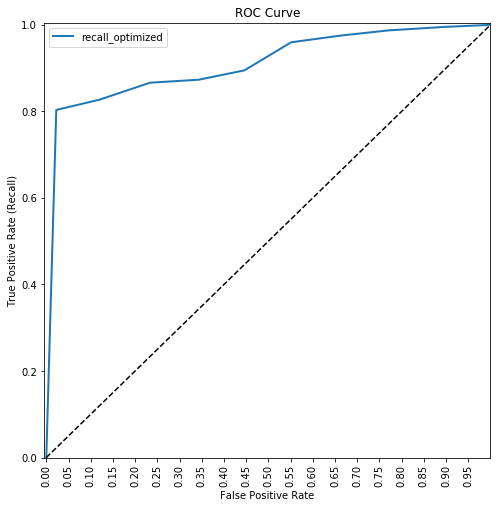

In [21]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
print("Area Under the Curve ", auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [22]:
print(predicted_tree)

[7 1 6 ... 4 2 5]


In [23]:
print(r_response_test)

31570    7
22469    1
7808     6
15113    6
41855    2
31561    1
19651    0
7940     2
6508     6
26146    0
4772     2
528      8
1500     1
40283    8
6782     2
14614    8
5176     2
9862     5
32194    4
34622    7
12635    0
4005     0
18828    0
33288    6
38427    4
10296    6
14366    9
31849    5
11802    3
40799    7
        ..
22810    4
34347    0
39631    0
30504    3
33740    7
8118     5
2623     9
12834    8
24951    4
20020    4
12209    3
29103    4
16368    9
23443    0
13245    7
2039     3
32588    5
21225    7
12884    7
36113    0
35170    9
27397    1
797      0
30463    4
8396     0
34096    1
19552    2
23590    4
27505    2
17785    5
Name: labels, Length: 10500, dtype: int64


#### Predciton using Valdation Data and used for Kaggle Accuracy

In [37]:
predicted_on_vali_tree=clf.predict(validation_data)

In [40]:
output = pd.DataFrame(predicted_on_vali_tree, columns =['Label'])

In [41]:
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output_tree.csv', index=False)